In [1]:
# load input data

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

train_df = pd.read_csv("input/train.csv")

X_test = pd.read_csv("input/test.csv")

In [2]:
train_df.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

In [3]:
train_df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

# 1. Data Prepping

### Target value

Text(0.5, 1.0, 'Target - Histogram')

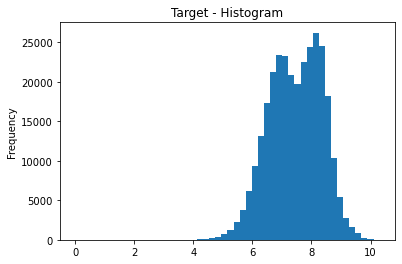

In [5]:
# histogram of target
train_df["target"].plot(kind='hist', bins=50)
plt.title('Target - Histogram')

Text(0.5, 1.0, 'Target - Boxplot')

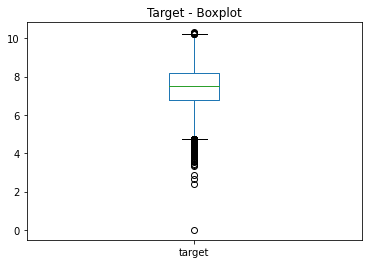

In [6]:
# boxplot of target => looking for outliers
train_df["target"].plot(kind='box')
plt.title('Target - Boxplot')

299116


Text(0.5, 1.0, 'Target - Boxplot')

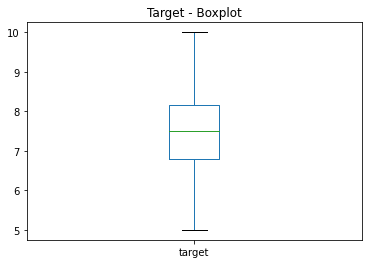

In [7]:
# remove outliers
train_df = train_df[(train_df["target"]>5)&(train_df["target"]<10)]
print(len(train_df))

# boxplot of target after outlier removed
train_df["target"].plot(kind='box')
plt.title('Target - Boxplot')

### Numerical Features

In [8]:
features_num = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
                'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
                'cont13']

In [9]:
'''# plot distribution of numerical features
for f in features_num:
    plt.figure(figsize=(8,4))
    train_df[f].plot(kind='hist', bins=100)
    plt.title(f)'''

"# plot distribution of numerical features\nfor f in features_num:\n    plt.figure(figsize=(8,4))\n    train_df[f].plot(kind='hist', bins=100)\n    plt.title(f)"

Text(0.5, 0.98, 'Histograms of Numerical Features')

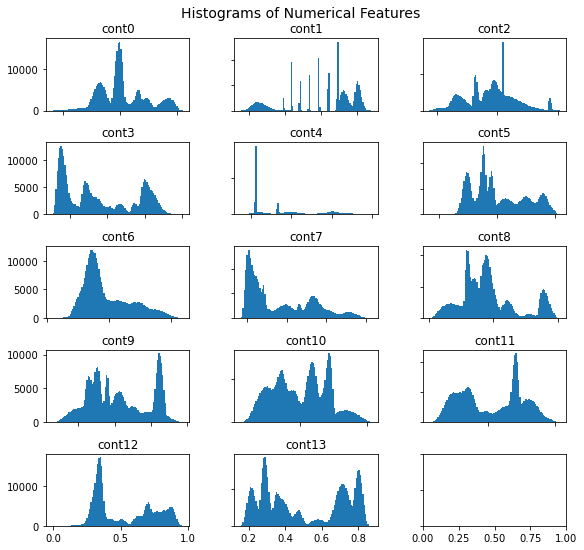

In [10]:
# Histogram for each numeric feature

fig, axs = plt.subplots(5, 3)
fig.set_size_inches(8, 8)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

axs[0, 0].hist(train_df[features_num[0]], bins=100)
axs[0, 0].set_title(f'{features_num[0]}')

axs[0, 1].hist(train_df[features_num[1]], bins=100)
axs[0, 1].set_title(f'{features_num[1]}')

axs[0, 2].hist(train_df[features_num[2]], bins=100)
axs[0, 2].set_title(f'{features_num[2]}')

axs[1, 0].hist(train_df[features_num[3]], bins=100)
axs[1, 0].set_title(f'{features_num[3]}')

axs[1, 1].hist(train_df[features_num[4]], bins=100)
axs[1, 1].set_title(f'{features_num[4]}')

axs[1, 2].hist(train_df[features_num[5]], bins=100)
axs[1, 2].set_title(f'{features_num[5]}')

axs[2, 0].hist(train_df[features_num[6]], bins=100)
axs[2, 0].set_title(f'{features_num[6]}')

axs[2, 1].hist(train_df[features_num[7]], bins=100)
axs[2, 1].set_title(f'{features_num[7]}')

axs[2, 2].hist(train_df[features_num[8]], bins=100)
axs[2, 2].set_title(f'{features_num[8]}')

axs[3, 0].hist(train_df[features_num[9]], bins=100)
axs[3, 0].set_title(f'{features_num[9]}')

axs[3, 1].hist(train_df[features_num[10]], bins=100)
axs[3, 1].set_title(f'{features_num[10]}')

axs[3, 2].hist(train_df[features_num[11]], bins=100)
axs[3, 2].set_title(f'{features_num[11]}')

axs[4, 0].hist(train_df[features_num[12]], bins=100)
axs[4, 0].set_title(f'{features_num[12]}')

axs[4, 1].hist(train_df[features_num[13]], bins=100)
axs[4, 1].set_title(f'{features_num[13]}')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle("Histograms of Numerical Features", size=14)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

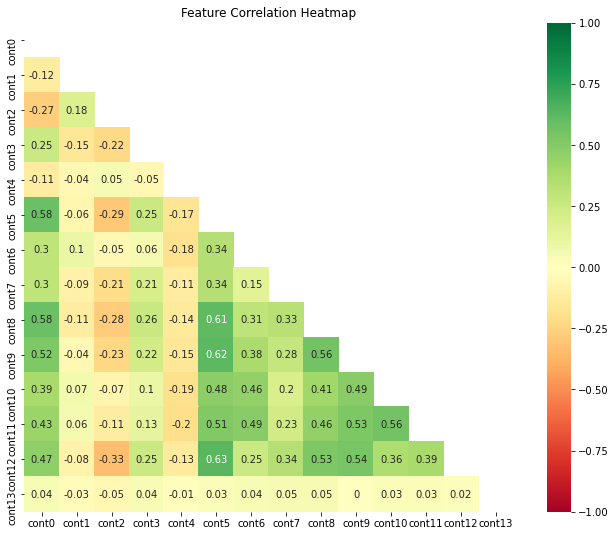

In [11]:
# Correlation Plot 

fig = plt.figure(figsize = (12,9))
matrix = np.triu(train_df[features_num].corr())
sns.heatmap(round(train_df[features_num].corr(),2), vmin=-1, vmax=1, center=0, square=True,
            annot=True, cmap='RdYlGn', mask=matrix)
plt.title('Feature Correlation Heatmap')

### Categorical Features

In [12]:
features_cat = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 
                'cat7', 'cat8', 'cat9']

Text(0.5, 0.98, 'Countplot Categorical Features')

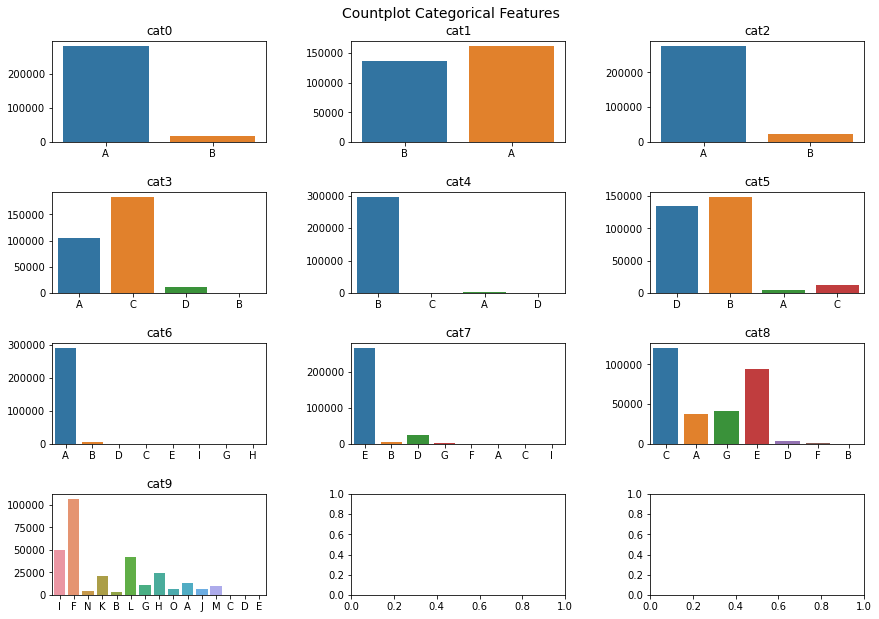

In [13]:
# Countplots for each Categorical Feature
fig, axs = plt.subplots(4, 3)
fig.set_size_inches(12, 9)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(wspace=0.4, hspace=0.5)

sns.countplot(data=train_df, x=features_cat[0], ax=axs.flatten()[0])
axs.flatten()[0].title.set_text(features_cat[0])
axs.flatten()[0].set(xlabel=None)
axs.flatten()[0].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[1], ax=axs.flatten()[1])
axs.flatten()[1].title.set_text(features_cat[1])
axs.flatten()[1].set(xlabel=None)
axs.flatten()[1].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[2], ax=axs.flatten()[2])
axs.flatten()[2].title.set_text(features_cat[2])
axs.flatten()[2].set(xlabel=None)
axs.flatten()[2].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[3], ax=axs.flatten()[3])
axs.flatten()[3].title.set_text(features_cat[3])
axs.flatten()[3].set(xlabel=None)
axs.flatten()[3].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[4], ax=axs.flatten()[4])
axs.flatten()[4].title.set_text(features_cat[4])
axs.flatten()[4].set(xlabel=None)
axs.flatten()[4].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[5], ax=axs.flatten()[5])
axs.flatten()[5].title.set_text(features_cat[5])
axs.flatten()[5].set(xlabel=None)
axs.flatten()[5].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[6], ax=axs.flatten()[6])
axs.flatten()[6].title.set_text(features_cat[6])
axs.flatten()[6].set(xlabel=None)
axs.flatten()[6].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[7], ax=axs.flatten()[7])
axs.flatten()[7].title.set_text(features_cat[7])
axs.flatten()[7].set(xlabel=None)
axs.flatten()[7].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[8], ax=axs.flatten()[8])
axs.flatten()[8].title.set_text(features_cat[8])
axs.flatten()[8].set(xlabel=None)
axs.flatten()[8].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[9], ax=axs.flatten()[9])
axs.flatten()[9].title.set_text(features_cat[9])
axs.flatten()[9].set(xlabel=None)
axs.flatten()[9].set(ylabel=None)


plt.suptitle("Countplot Categorical Features", size=14)

### Relationship between Features and Target

[Text(0.5, 59.99999999999993, '')]

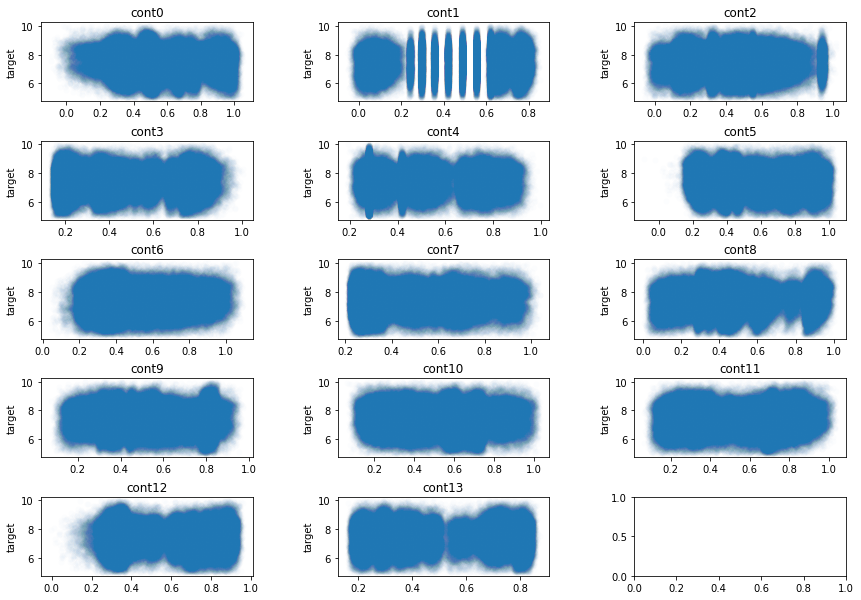

In [14]:
# Scatter Plot for Target and Numeric Feature
fig, axs = plt.subplots(5, 3)
fig.set_size_inches(12, 9)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(wspace=0.4, hspace=0.5)

sns.scatterplot(data=train_df, x=features_num[0], y="target", ax=axs.flatten()[0], alpha=0.01)
axs.flatten()[0].title.set_text(features_num[0])
axs.flatten()[0].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[1], y="target", ax=axs.flatten()[1], alpha=0.01)
axs.flatten()[1].title.set_text(features_num[1])
axs.flatten()[1].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[2], y="target", ax=axs.flatten()[2], alpha=0.01)
axs.flatten()[2].title.set_text(features_num[2])
axs.flatten()[2].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[3], y="target", ax=axs.flatten()[3], alpha=0.01)
axs.flatten()[3].title.set_text(features_num[3])
axs.flatten()[3].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[4], y="target", ax=axs.flatten()[4], alpha=0.01)
axs.flatten()[4].title.set_text(features_num[4])
axs.flatten()[4].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[5], y="target", ax=axs.flatten()[5], alpha=0.01)
axs.flatten()[5].title.set_text(features_num[5])
axs.flatten()[5].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[6], y="target", ax=axs.flatten()[6], alpha=0.01)
axs.flatten()[6].title.set_text(features_num[6])
axs.flatten()[6].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[7], y="target", ax=axs.flatten()[7], alpha=0.01)
axs.flatten()[7].title.set_text(features_num[7])
axs.flatten()[7].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[8], y="target", ax=axs.flatten()[8], alpha=0.01)
axs.flatten()[8].title.set_text(features_num[8])
axs.flatten()[8].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[9], y="target", ax=axs.flatten()[9], alpha=0.01)
axs.flatten()[9].title.set_text(features_num[9])
axs.flatten()[9].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[10], y="target", ax=axs.flatten()[10], alpha=0.01)
axs.flatten()[10].title.set_text(features_num[10])
axs.flatten()[10].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[11], y="target", ax=axs.flatten()[11], alpha=0.01)
axs.flatten()[11].title.set_text(features_num[11])
axs.flatten()[11].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[12], y="target", ax=axs.flatten()[12], alpha=0.01)
axs.flatten()[12].title.set_text(features_num[12])
axs.flatten()[12].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[13], y="target", ax=axs.flatten()[13], alpha=0.01)
axs.flatten()[13].title.set_text(features_num[13])
axs.flatten()[13].set(xlabel=None)

# 2. Model Building

In [18]:
X = train_df.drop(columns=["target","id"])
X.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

In [19]:
y = train_df[["target"]]
y.columns

Index(['target'], dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [54]:
len(X_train)

239292

In [55]:
len(X_test)

59824

In [56]:
len(y_train)

239292

In [57]:
len(y_test)

59824

In [21]:
X_submit = pd.read_csv("input/test.csv").drop(columns=["id"])
X_submit.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

### 1. Random Forest (Simple)

In [210]:
# Pipeline
# Standardize numeric values and one-hot encode categorical values
# the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

# Random Forest Regressor
rnd_reg = RandomForestRegressor(n_estimators=400,verbose=True, n_jobs=-1)

# Full Prediction Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', rnd_reg)])

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit model
model.fit(X_train, np.array(y_train).ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  9.1min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6', 'c

In [211]:
# Predict
y_train_pred = model.predict(X_train)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred, squared=False),4)))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    8.7s


explained_variance_score: 0.873
r2_score: 0.873
mean_absolute_error: 0.2611
root_mean_squared_error: 0.3121


[Parallel(n_jobs=12)]: Done 400 out of 400 | elapsed:   19.1s finished


In [212]:
# predict
y_test = model.predict(X_test)
y_test

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    5.1s
[Parallel(n_jobs=12)]: Done 400 out of 400 | elapsed:   12.3s finished


array([7.41972887, 7.99575107, 7.46536824, ..., 7.37213012, 7.61257345,
       7.4806215 ])

In [214]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_test
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/random_forest_simple_{name_add}.csv", index=False)

### 2. Random Forest (Tuned)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

# Grid Search Parameters
param_grid =  {'n_estimators': [200,400,600,1000,1500], 
               'max_depth': [3,5,10,50,100,None],
               'min_samples_leaf': [1,2,4,6,10],
               'min_samples_split': [2,5,10,20]}

# Full Pipeline
rnd_reg = make_pipeline(preprocessor, 
                        RandomizedSearchCV(RandomForestRegressor(bootstrap=True, max_samples=0.01),
                                           n_iter=100,
                                           param_distributions=param_grid, cv=3, refit=True, 
                                           n_jobs=-1, verbose=10)
                       )

rnd_reg.fit(X_train, np.array(y_train).ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  4.7min
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 121

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6

In [49]:
rnd_reg["randomizedsearchcv"].best_params_

{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': None}

In [50]:
# Predict
y_train_pred = rnd_reg.predict(X_train)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred, squared=False),4)))

explained_variance_score: 0.0837
r2_score: 0.0837
mean_absolute_error: 0.7049
root_mean_squared_error: 0.8382


In [54]:
# use optimized parameter and fully train model again


'''# Hyperparameters
params = {'n_estimators': [200,400,600,1000,1500],
          'max_depth': [3,5,10,50,100,None],
          'min_samples_leaf': [1,2,4,6,10],
          'min_samples_split': [2,5,10,20],
          ''
         
         }'''

# Full Pipeline
rnd_reg = make_pipeline(preprocessor, 
                        RandomForestRegressor(n_estimators=1500,
                                              min_samples_split=2,
                                              min_samples_leaf=4,
                                              max_depth=None,
                                              verbose=10)
                       )

rnd_reg.fit(X_train, np.array(y_train).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


building tree 2 of 1500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.1s remaining:    0.0s


building tree 3 of 1500


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.4s remaining:    0.0s


building tree 4 of 1500


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   28.6s remaining:    0.0s


building tree 5 of 1500


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.7s remaining:    0.0s


building tree 6 of 1500


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   42.9s remaining:    0.0s


building tree 7 of 1500


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   50.2s remaining:    0.0s


building tree 8 of 1500


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   57.5s remaining:    0.0s


building tree 9 of 1500


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


building tree 10 of 1500
building tree 11 of 1500
building tree 12 of 1500
building tree 13 of 1500
building tree 14 of 1500
building tree 15 of 1500
building tree 16 of 1500
building tree 17 of 1500
building tree 18 of 1500
building tree 19 of 1500
building tree 20 of 1500
building tree 21 of 1500
building tree 22 of 1500
building tree 23 of 1500
building tree 24 of 1500
building tree 25 of 1500
building tree 26 of 1500
building tree 27 of 1500
building tree 28 of 1500
building tree 29 of 1500
building tree 30 of 1500
building tree 31 of 1500
building tree 32 of 1500
building tree 33 of 1500
building tree 34 of 1500
building tree 35 of 1500
building tree 36 of 1500
building tree 37 of 1500
building tree 38 of 1500
building tree 39 of 1500
building tree 40 of 1500
building tree 41 of 1500
building tree 42 of 1500
building tree 43 of 1500
building tree 44 of 1500
building tree 45 of 1500
building tree 46 of 1500
building tree 47 of 1500
building tree 48 of 1500
building tree 49 of 1500


building tree 329 of 1500
building tree 330 of 1500
building tree 331 of 1500
building tree 332 of 1500
building tree 333 of 1500
building tree 334 of 1500
building tree 335 of 1500
building tree 336 of 1500
building tree 337 of 1500
building tree 338 of 1500
building tree 339 of 1500
building tree 340 of 1500
building tree 341 of 1500
building tree 342 of 1500
building tree 343 of 1500
building tree 344 of 1500
building tree 345 of 1500
building tree 346 of 1500
building tree 347 of 1500
building tree 348 of 1500
building tree 349 of 1500
building tree 350 of 1500
building tree 351 of 1500
building tree 352 of 1500
building tree 353 of 1500
building tree 354 of 1500
building tree 355 of 1500
building tree 356 of 1500
building tree 357 of 1500
building tree 358 of 1500
building tree 359 of 1500
building tree 360 of 1500
building tree 361 of 1500
building tree 362 of 1500
building tree 363 of 1500
building tree 364 of 1500
building tree 365 of 1500
building tree 366 of 1500
building tre

building tree 645 of 1500
building tree 646 of 1500
building tree 647 of 1500
building tree 648 of 1500
building tree 649 of 1500
building tree 650 of 1500
building tree 651 of 1500
building tree 652 of 1500
building tree 653 of 1500
building tree 654 of 1500
building tree 655 of 1500
building tree 656 of 1500
building tree 657 of 1500
building tree 658 of 1500
building tree 659 of 1500
building tree 660 of 1500
building tree 661 of 1500
building tree 662 of 1500
building tree 663 of 1500
building tree 664 of 1500
building tree 665 of 1500
building tree 666 of 1500
building tree 667 of 1500
building tree 668 of 1500
building tree 669 of 1500
building tree 670 of 1500
building tree 671 of 1500
building tree 672 of 1500
building tree 673 of 1500
building tree 674 of 1500
building tree 675 of 1500
building tree 676 of 1500
building tree 677 of 1500
building tree 678 of 1500
building tree 679 of 1500
building tree 680 of 1500
building tree 681 of 1500
building tree 682 of 1500
building tre

building tree 961 of 1500
building tree 962 of 1500
building tree 963 of 1500
building tree 964 of 1500
building tree 965 of 1500
building tree 966 of 1500
building tree 967 of 1500
building tree 968 of 1500
building tree 969 of 1500
building tree 970 of 1500
building tree 971 of 1500
building tree 972 of 1500
building tree 973 of 1500
building tree 974 of 1500
building tree 975 of 1500
building tree 976 of 1500
building tree 977 of 1500
building tree 978 of 1500
building tree 979 of 1500
building tree 980 of 1500
building tree 981 of 1500
building tree 982 of 1500
building tree 983 of 1500
building tree 984 of 1500
building tree 985 of 1500
building tree 986 of 1500
building tree 987 of 1500
building tree 988 of 1500
building tree 989 of 1500
building tree 990 of 1500
building tree 991 of 1500
building tree 992 of 1500
building tree 993 of 1500
building tree 994 of 1500
building tree 995 of 1500
building tree 996 of 1500
building tree 997 of 1500
building tree 998 of 1500
building tre

building tree 1266 of 1500
building tree 1267 of 1500
building tree 1268 of 1500
building tree 1269 of 1500
building tree 1270 of 1500
building tree 1271 of 1500
building tree 1272 of 1500
building tree 1273 of 1500
building tree 1274 of 1500
building tree 1275 of 1500
building tree 1276 of 1500
building tree 1277 of 1500
building tree 1278 of 1500
building tree 1279 of 1500
building tree 1280 of 1500
building tree 1281 of 1500
building tree 1282 of 1500
building tree 1283 of 1500
building tree 1284 of 1500
building tree 1285 of 1500
building tree 1286 of 1500
building tree 1287 of 1500
building tree 1288 of 1500
building tree 1289 of 1500
building tree 1290 of 1500
building tree 1291 of 1500
building tree 1292 of 1500
building tree 1293 of 1500
building tree 1294 of 1500
building tree 1295 of 1500
building tree 1296 of 1500
building tree 1297 of 1500
building tree 1298 of 1500
building tree 1299 of 1500
building tree 1300 of 1500
building tree 1301 of 1500
building tree 1302 of 1500
b

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 181.6min finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6

In [55]:
# Predict
y_train_pred = rnd_reg.predict(X_train)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred, squared=False),4)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


explained_variance_score: 0.7273
r2_score: 0.7273
mean_absolute_error: 0.3749
root_mean_squared_error: 0.4573


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  2.1min finished


In [56]:
# predict
y_test = rnd_reg.predict(X_test)
y_test

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.3min finished


array([7.52814464, 7.88982929, 7.56139966, ..., 7.4192657 , 7.6113732 ,
       7.61071846])

In [57]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_test
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/random_forest_tuned_{name_add}.csv", index=False)

### 3. Extremly Randomized Decision Trees

In [41]:
# Pipeline
# Standardize numeric values and one-hot encode categorical values
# the Random Forest Regressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

# Random Forest Regressor
extra_rnd_reg = ExtraTreesRegressor()

# Grid Search Parameters
param_grid =  {'n_estimators': [200,400,600,1000], 
               'max_features': [2,5,10,15,20,None],
               'max_depth': [5,10,50,100,None],
               'min_samples_leaf': [0.01,0.05,0.1,None],
               'min_samples_split': [2,5,10,20]}

# Full Pipeline
model = make_pipeline(preprocessor, 
                        RandomizedSearchCV(extra_rnd_reg,
                                           n_iter=100,
                                           param_distributions=param_grid, cv=3, refit=True, 
                                           n_jobs=-1, verbose=10)
                       )

# Fit model
%time model.fit(X_train, np.array(y_train).ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 54.8min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 68.7min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 78.4min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 109.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 126.7min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:

CPU times: user 16min 46s, sys: 2.2 s, total: 16min 49s
Wall time: 3h 49min 32s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6

In [63]:
model["randomizedsearchcv"].best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 0.01,
 'max_features': None,
 'max_depth': 50}

In [58]:
# Score on Training Data
model.score(X_train, y_train)

0.046206797253744325

In [59]:
# Predict on Test Data
y_test_pred = model.predict(X_test)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_test, y_test_pred),4)))
print("r2_score: " + str(round(r2_score(y_test, y_test_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_test, y_test_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_test, y_test_pred, squared=False),4)))

explained_variance_score: 0.0428
r2_score: 0.0427
mean_absolute_error: 0.7163
root_mean_squared_error: 0.8553


In [60]:
# predict for submission
y_test_submit = model.predict(X_submit)
y_test_submit

array([7.55082493, 7.72041938, 7.65008282, ..., 7.44846948, 7.55988436,
       7.41965781])

In [61]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_test_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/extra_random_{name_add}.csv", index=False)

### 4. XGBoost

In [77]:
# preprocess before XGBoost

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

X_pre = preprocessor.fit_transform(X)

In [78]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.3, shuffle=True, random_state=0)

In [79]:
import xgboost as xgb

# convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [82]:
# baseline model

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'eval_metric':'rmse',
    # Other parameters
    'objective':'reg:squarederror',
}

num_boost_round = 300

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:4.94578
[1]	Test-rmse:3.51384
[2]	Test-rmse:2.53265
[3]	Test-rmse:1.87275
[4]	Test-rmse:1.44325
[5]	Test-rmse:1.17698
[6]	Test-rmse:1.02123
[7]	Test-rmse:0.93561
[8]	Test-rmse:0.89040
[9]	Test-rmse:0.86724
[10]	Test-rmse:0.85562
[11]	Test-rmse:0.84952
[12]	Test-rmse:0.84633
[13]	Test-rmse:0.84460
[14]	Test-rmse:0.84344
[15]	Test-rmse:0.84284
[16]	Test-rmse:0.84232
[17]	Test-rmse:0.84202
[18]	Test-rmse:0.84194
[19]	Test-rmse:0.84162
[20]	Test-rmse:0.84147
[21]	Test-rmse:0.84113
[22]	Test-rmse:0.84103
[23]	Test-rmse:0.84078
[24]	Test-rmse:0.84057
[25]	Test-rmse:0.84036
[26]	Test-rmse:0.84029
[27]	Test-rmse:0.84025
[28]	Test-rmse:0.84001
[29]	Test-rmse:0.83990
[30]	Test-rmse:0.83993
[31]	Test-rmse:0.83970
[32]	Test-rmse:0.83952
[33]	Test-rmse:0.83943
[34]	Test-rmse:0.83943
[35]	Test-rmse:0.83933
[36]	Test-rmse:0.83931
[37]	Test-rmse:0.83931
[38]	Test-rmse:0.83929
[39]	Test-rmse:0.83925
[40]	Test-rmse:0.83928
[41]	Test-rmse:0.83918
[42]	Test-rmse:0.83915
[43]	Test-rmse:0.8390

In [83]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.952429,0.000700,4.952493,0.004464
1,3.520318,0.000407,3.520538,0.004396
2,2.538520,0.000227,2.539046,0.004219
3,1.877892,0.000222,1.878950,0.003780
4,1.447294,0.000348,1.449028,0.003001
5,1.179358,0.000410,1.182089,0.002083
6,1.021808,0.000695,1.025664,0.001443
7,0.934314,0.000932,0.939160,0.001363
8,0.887551,0.000925,0.893373,0.001774
9,0.862848,0.000873,0.869547,0.002349


<AxesSubplot:ylabel='train-rmse-mean'>

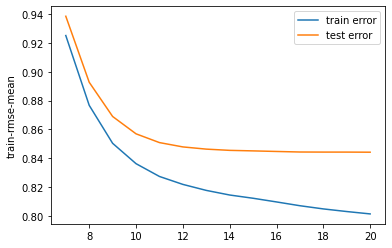

In [91]:
# plot Curve
import seaborn as sns
temp = cv_results[cv_results["train-rmse-mean"]<1]
sns.lineplot(data=temp, x=temp.index, y="train-rmse-mean", label="train error")
sns.lineplot(data=temp, x=temp.index, y="test-rmse-mean", label="test error")

In [87]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(2,9)
    for min_child_weight in range(2,9)
]

# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10,
    )
    
    # Update best RME
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=2, min_child_weight=2
	RMSE 0.836466 for 295 rounds
CV with max_depth=2, min_child_weight=3
	RMSE 0.8364373333333334 for 293 rounds
CV with max_depth=2, min_child_weight=4
	RMSE 0.83656 for 277 rounds
CV with max_depth=2, min_child_weight=5
	RMSE 0.8365459999999999 for 287 rounds
CV with max_depth=2, min_child_weight=6
	RMSE 0.8368953333333334 for 230 rounds
CV with max_depth=2, min_child_weight=7
	RMSE 0.8365393333333334 for 267 rounds
CV with max_depth=2, min_child_weight=8
	RMSE 0.8365723333333334 for 266 rounds
CV with max_depth=3, min_child_weight=2
	RMSE 0.8366516666666666 for 173 rounds
CV with max_depth=3, min_child_weight=3
	RMSE 0.8369263333333334 for 161 rounds
CV with max_depth=3, min_child_weight=4
	RMSE 0.8368983333333334 for 154 rounds
CV with max_depth=3, min_child_weight=5
	RMSE 0.8371763333333333 for 120 rounds
CV with max_depth=3, min_child_weight=6
	RMSE 0.8369713333333332 for 144 rounds
CV with max_depth=3, min_child_weight=7
	RMSE 0.8369083333333

In [88]:
# add best parameters
params['max_depth'] = 2
params['min_child_weight'] = 2

In [92]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
	RMSE 0.836466 for 295 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 0.8365396666666666 for 244 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 0.8364743333333333 for 274 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 0.8363359999999999 for 299 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 0.8363743333333332 for 299 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 0.8366349999999999 for 295 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 0.8367533333333332 for 257 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 0.8363936666666666 for 267 rounds
CV with subsample=0.8, colsample=1.0
	RMSE 0.8368713333333333 for 256 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 0.8366340000000001 for 299 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 0.8367133333333333 for 286 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 0.8366563333333333 for 267 rounds
CV with subsample=0.7, colsample=1.0
	RMSE 0.8374990000000001 for 200 rounds
CV with s

In [93]:
# update parameter
params['subsample'] = 1.0
params['colsample_bytree'] = 0.7

In [96]:
# Find best learning rate eta

%time

min_rmse= float("Inf")
best_params = None
for eta in [1, .5, .3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round,seed=42,nfold=3,metrics=['rmse'],early_stopping_rounds=10)
    # Update best score
    mean_rsme = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
CV with eta=1
CPU times: user 2min 33s, sys: 4.05 s, total: 2min 37s
Wall time: 16.5 s
	RMSE 0.836808 for 103 rounds

CV with eta=0.5
CPU times: user 4min 12s, sys: 6.49 s, total: 4min 19s
Wall time: 26.5 s
	RMSE 0.836808 for 161 rounds

CV with eta=0.3
CPU times: user 7min 30s, sys: 10.3 s, total: 7min 40s
Wall time: 45.3 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.2
CPU times: user 7min 29s, sys: 10.7 s, total: 7min 39s
Wall time: 46.1 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.1
CPU times: user 7min 27s, sys: 10.3 s, total: 7min 37s
Wall time: 45.1 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.05
CPU times: user 7min 29s, sys: 10.3 s, total: 7min 39s
Wall time: 45.1 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.01
CPU times: user 7min 28s, sys: 10.4 s, total: 7min 39s
Wall time: 45.3 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.005
CPU times: user 7min 28s, sys: 10.4 s, total: 7min 38s
Wall time: 45.2 s
	RMSE

NameError: name 'min_mae' is not defined

In [97]:
params['eta'] = .3

In [98]:
# final parameter
params

{'max_depth': 2,
 'min_child_weight': 2,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.7,
 'eval_metric': 'rmse',
 'objective': 'reg:squarederror'}

In [99]:
final_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best RMSE: {:.2f} in {} rounds".format(final_model.best_score, final_model.best_iteration+1))

[0]	Test-rmse:4.94618
[1]	Test-rmse:3.51513
[2]	Test-rmse:2.53501
[3]	Test-rmse:1.87663
[4]	Test-rmse:1.44875
[5]	Test-rmse:1.18411
[6]	Test-rmse:1.02999
[7]	Test-rmse:0.94517
[8]	Test-rmse:0.90047
[9]	Test-rmse:0.87723
[10]	Test-rmse:0.86544
[11]	Test-rmse:0.85930
[12]	Test-rmse:0.85601
[13]	Test-rmse:0.85410
[14]	Test-rmse:0.85288
[15]	Test-rmse:0.85207
[16]	Test-rmse:0.85149
[17]	Test-rmse:0.85105
[18]	Test-rmse:0.85057
[19]	Test-rmse:0.85012
[20]	Test-rmse:0.84980
[21]	Test-rmse:0.84941
[22]	Test-rmse:0.84909
[23]	Test-rmse:0.84877
[24]	Test-rmse:0.84840
[25]	Test-rmse:0.84812
[26]	Test-rmse:0.84786
[27]	Test-rmse:0.84756
[28]	Test-rmse:0.84725
[29]	Test-rmse:0.84700
[30]	Test-rmse:0.84674
[31]	Test-rmse:0.84649
[32]	Test-rmse:0.84629
[33]	Test-rmse:0.84609
[34]	Test-rmse:0.84590
[35]	Test-rmse:0.84576
[36]	Test-rmse:0.84559
[37]	Test-rmse:0.84535
[38]	Test-rmse:0.84518
[39]	Test-rmse:0.84501
[40]	Test-rmse:0.84485
[41]	Test-rmse:0.84474
[42]	Test-rmse:0.84463
[43]	Test-rmse:0.8445

In [100]:
# prediction with final_model
X_submit_pre = preprocessor.transform(X_submit)

y_submit = final_model.predict(xgb.DMatrix(X_submit_pre))
y_submit

array([7.596984 , 7.7184544, 7.566323 , ..., 7.5610046, 7.4194016,
       7.389242 ], dtype=float32)

In [103]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/xgboost_tuned_{name_add}.csv", index=False)

## 4. Bagging and other bootstrapping models

In [108]:
# preprocess before model building

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

X_pre = preprocessor.fit_transform(X)

In [119]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.4, shuffle=True, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [117]:
print(X_train.shape)

(179469, 1)


In [120]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Bagging

bagging_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    bootstrap=True, max_samples=0.3, 
    #bootstrap_features = True, max_features=1.0,
    n_jobs=-1, verbose=3
)

bagging_reg.fit(X_train, y_train)
y_pred = bagging_reg.predict(X_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  3.2min remaining:  6.5min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  3.3min remaining:  1.1min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  3.4min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   26.0s remaining:   52.1s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   36.3s remaining:   12.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   39.7s finished


RMSE: 0.8434959569551181


In [121]:
# Pasting

pasting_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    bootstrap=False, max_samples=0.3, 
    #bootstrap_features = True, max_features=1.0,
    n_jobs=-1, verbose=3
)

pasting_reg.fit(X_train, y_train)
y_pred = pasting_reg.predict(X_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  3.7min remaining:  7.4min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  3.8min remaining:  1.3min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  3.8min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   28.0s remaining:   55.9s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   36.2s remaining:   12.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   39.8s finished


RMSE: 0.8433322216169691


In [122]:
# Random Subspace

rnd_subspace_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    #bootstrap=False, max_samples=0.3, 
    bootstrap_features = True, max_features=0.3,
    n_jobs=-1, verbose=3
)

rnd_subspace_reg.fit(X_train, y_train)
y_pred = rnd_subspace_reg.predict(X_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  2.6min remaining:  5.1min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  2.9min remaining:   57.4s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  3.0min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   24.1s remaining:   48.1s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   31.8s remaining:   10.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   33.9s finished


RMSE: 0.8510052704005299


In [125]:
# Random Patch

rnd_patch_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=1000,
    bootstrap=True, max_samples=0.4, 
    bootstrap_features = True, max_features=0.4,
    n_jobs=-1, verbose=3
)

rnd_patch_reg.fit(X_train, y_train)
y_pred = rnd_patch_reg.predict(X_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  3.2min remaining:  6.4min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  3.5min remaining:  1.2min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  3.6min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   28.2s remaining:   56.5s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   43.4s remaining:   14.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   45.8s finished


RMSE: 0.8475154222477036
